In [1]:
workdir = '~/dv/sns-chops/resolution/CNCS/mcvine'
!mkdir -p {workdir}
%cd {workdir}

/SNS/users/lj7/dv/sns-chops/resolution/CNCS/mcvine


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

import histogram.hdf as hh, histogram as H
import mcvine, mcvine.components as mcomps
from mcni.utils import conversion as C

from matplotlib import pyplot as plt
%matplotlib notebook

/SNS/software/miniconda2/envs/mcvine-unstable/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# CNCS moderator using "fitfit" model

In [7]:
sys.path.insert(0, os.path.abspath('..'))

In [76]:
import moderator
reload(moderator)

<module 'moderator' from '/SNS/users/lj7/dv/sns-chops/resolution/CNCS/moderator.py'>

In [29]:
lines = open('./SNS_IRP2_TD_BL5_30o70p_fit_fit.dat').readlines()
lines = [l.strip() for l in lines if not l.startswith('#')]

In [77]:
class CNCS(moderator.Instrument):
    IE_params = map(float, lines[0].split())
    A, B, R, to = lines[1:]
    It_params = A,B,R,to

cncs = CNCS()

## Test

In [85]:
ic_1meV = cncs.IC_atE(1*1e-3)

<IPython.core.display.Javascript object>


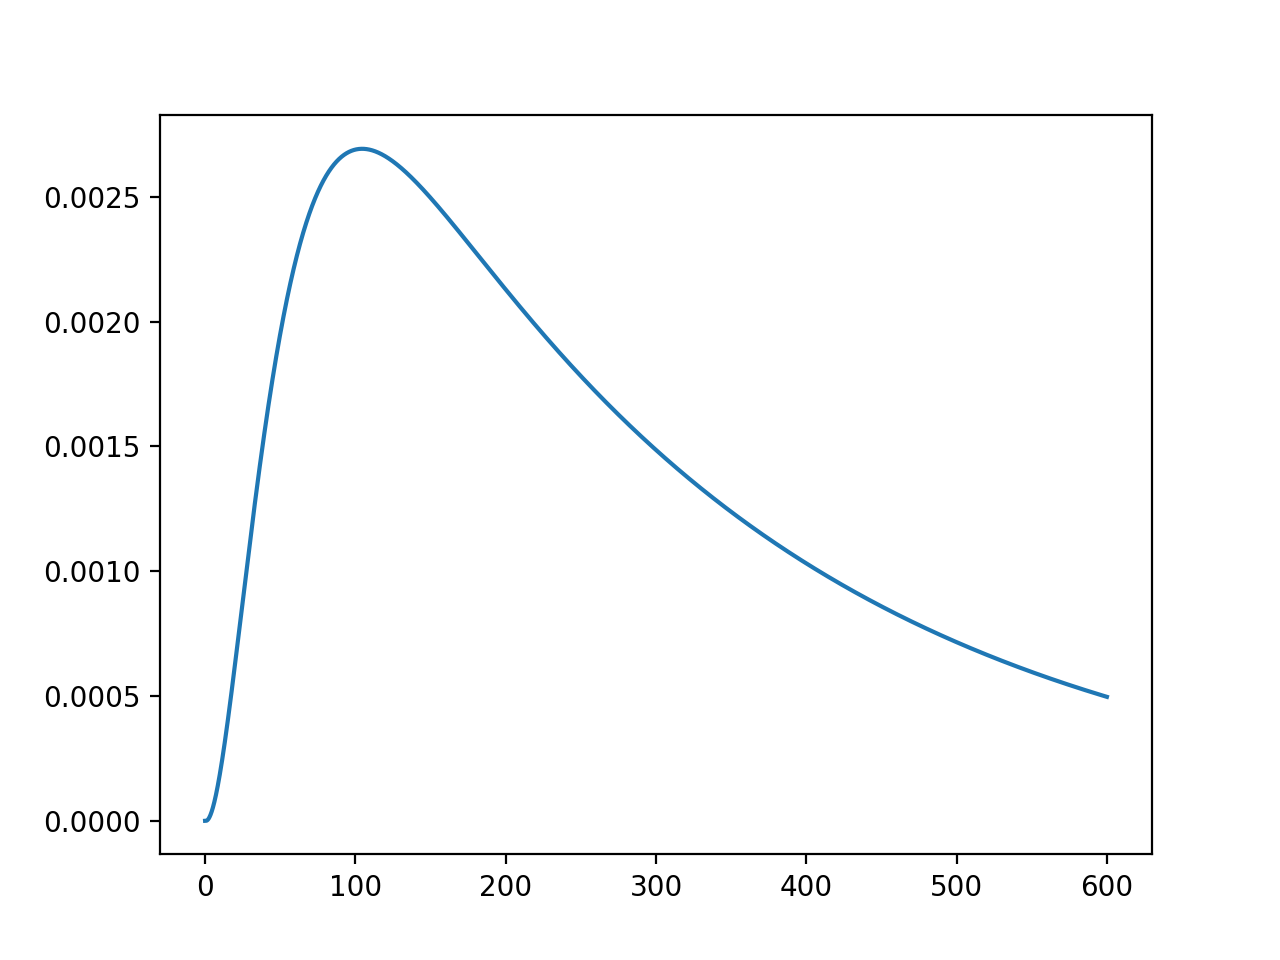

In [87]:
t = np.arange(0, 600, .01)
y = ic_1meV(t)
plt.figure()
plt.plot(t, y)

# Compute FWHM

In [41]:
Es = np.logspace(-1, 2)

In [88]:
spectra = [cncs.IC_atE(E*1e-3)(t) for E in Es]

In [89]:
fwhms = []
for E, sp in zip(Es, spectra):
    I = sp; tof = t
    max = I.max()
    hm = max/2
    top = tof[I>hm]
    fwhms.append(top[-1]-top[0])

In [90]:
fwhms = np.array(fwhms)

In [25]:
# np.savetxt('beam-fc-fwhms.txt', np.array([Es, fwhms]).T)

In [46]:
beam_fwhms = np.loadtxt('beam-fwhms.txt')[:, 1]

In [57]:
%matplotlib notebook

<IPython.core.display.Javascript object>


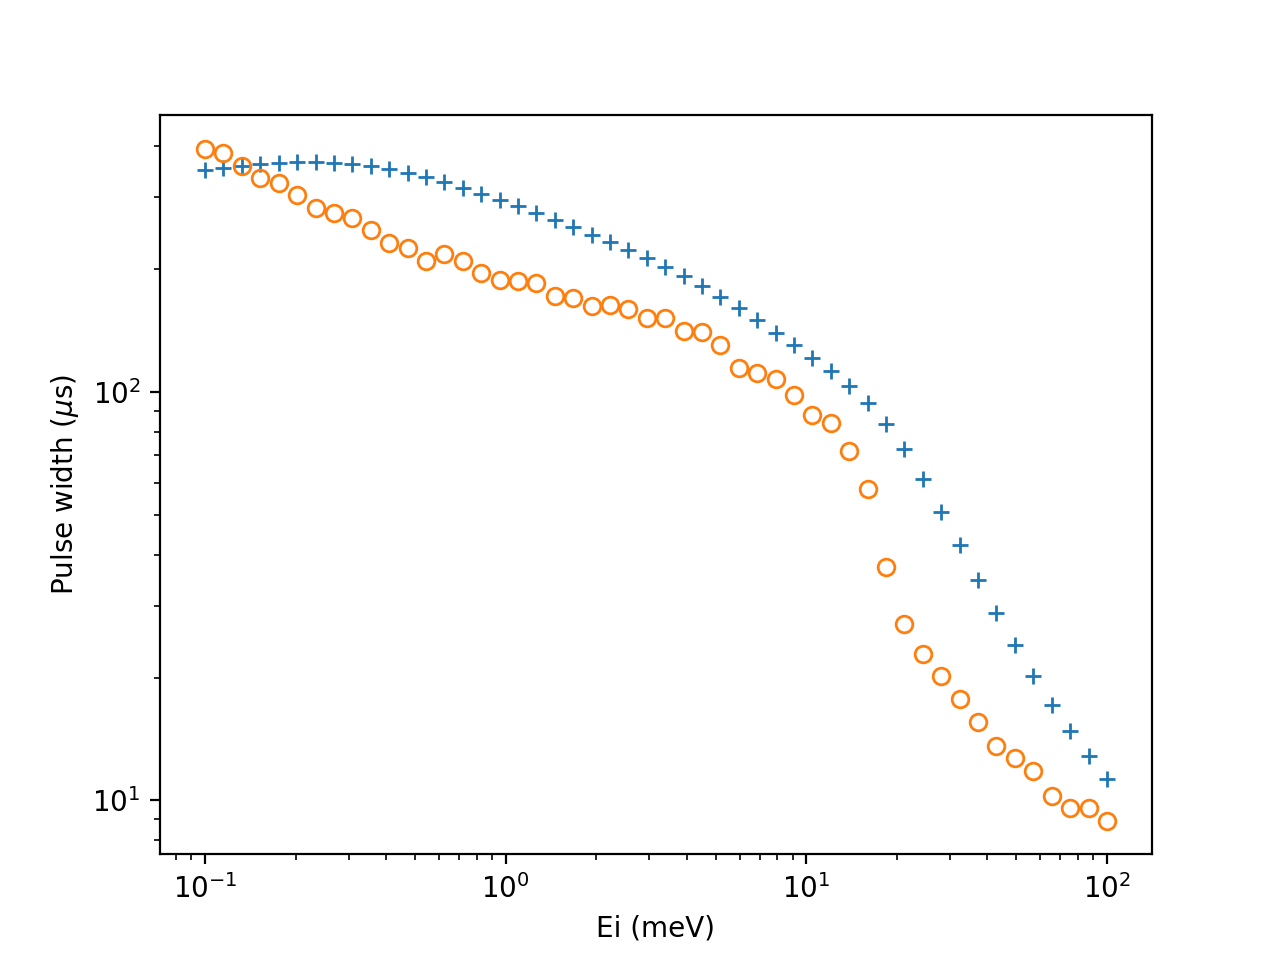

Text(0,0.5,u'Pulse width ($\\mu$s)')

In [98]:
plt.figure()
plt.loglog(Es, fwhms, '+')
plt.loglog(Es, 1e6*beam_fwhms, 'o', mfc='none')
plt.xlabel('Ei (meV)')
plt.ylabel('Pulse width ($\mu$s)')

<IPython.core.display.Javascript object>


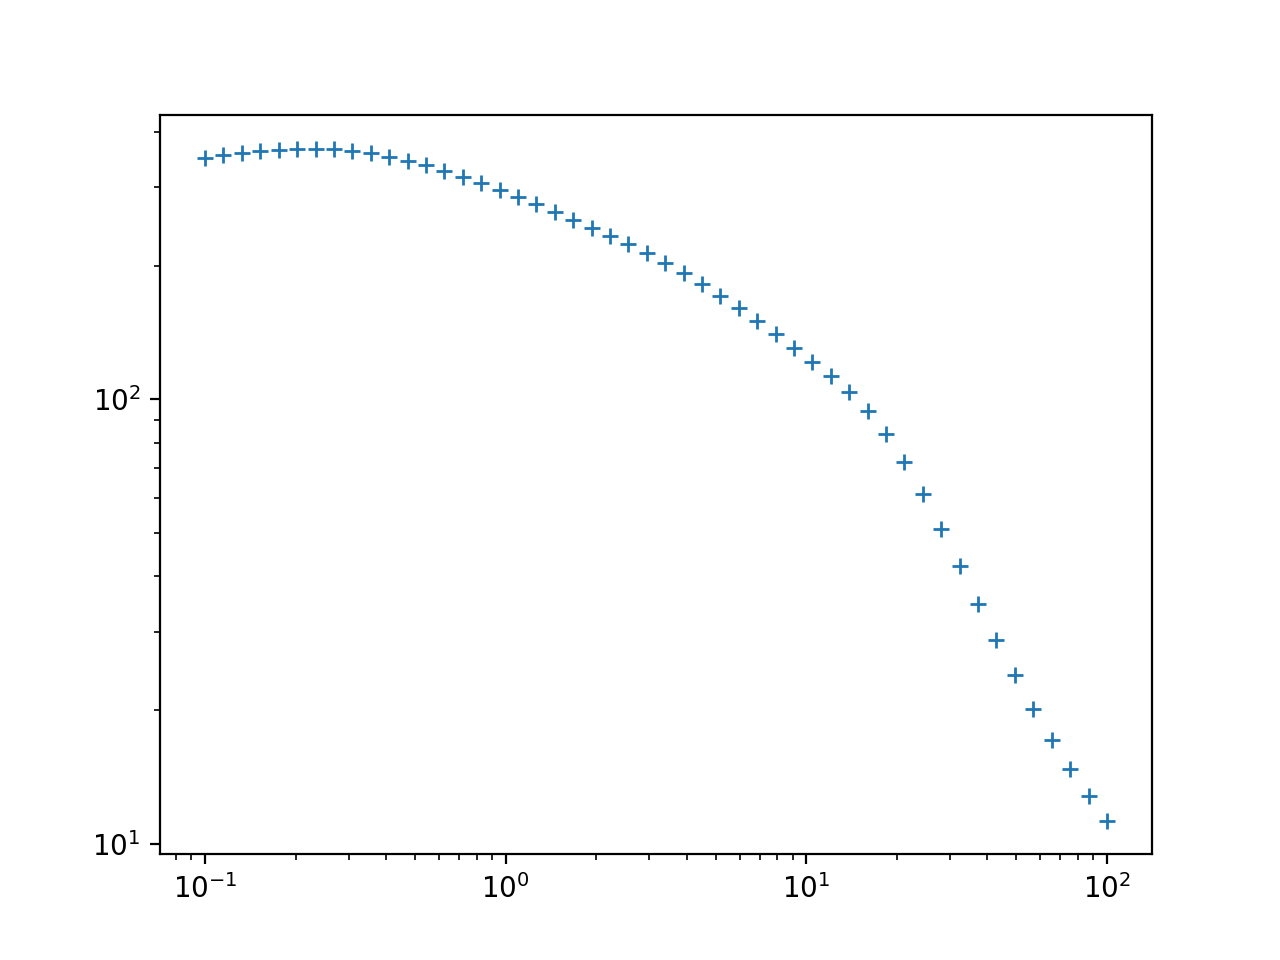

In [92]:
plt.figure()
plt.loglog(Es, fwhms, '+')

In [93]:
Es

array([  0.1       ,   0.11513954,   0.13257114,   0.1526418 ,
         0.17575106,   0.20235896,   0.23299518,   0.26826958,
         0.30888436,   0.35564803,   0.40949151,   0.47148664,
         0.54286754,   0.62505519,   0.71968567,   0.82864277,
         0.95409548,   1.09854114,   1.26485522,   1.45634848,
         1.67683294,   1.93069773,   2.22299648,   2.55954792,
         2.9470517 ,   3.39322177,   3.90693994,   4.49843267,
         5.17947468,   5.96362332,   6.86648845,   7.90604321,
         9.10298178,  10.48113134,  12.06792641,  13.89495494,
        15.9985872 ,  18.42069969,  21.20950888,  24.42053095,
        28.11768698,  32.37457543,  37.2759372 ,  42.9193426 ,
        49.41713361,  56.89866029,  65.51285569,  75.43120063,
        86.85113738, 100.        ])

In [94]:
from mcni.utils import conversion as conv

In [95]:
lambdas = 2*np.pi / ((conv.SE2V*conv.V2K)*np.sqrt(Es))

In [96]:
lambdas

array([28.60141458, 26.65479018, 24.84065387, 23.14998844, 21.57439041,
       20.10602826, 18.73760346, 17.46231422, 16.27382172, 15.16621852,
       14.13399926, 13.17203328, 12.27553911, 11.44006072, 10.66144534,
        9.93582285,  9.25958654,  8.62937515,  8.04205622,  7.49471047,
        6.9846173 ,  6.50924128,  6.06621956,  5.65335009,  5.26858069,
        4.90999885,  4.57582225,  4.26438985,  3.97415367,  3.70367109,
        3.45159766,  3.21668046,  2.99775183,  2.79372357,  2.60358156,
        2.42638069,  2.2612402 ,  2.10733923,  1.96391283,  1.83024809,
        1.70568063,  1.58959128,  1.48140303,  1.38057811,  1.28661538,
        1.19904779,  1.11744009,  1.04138664,  0.97050943,  0.90445614])

In [97]:
fwhms

array([349.37, 354.02, 358.23, 361.74, 364.36, 365.84, 366.  , 364.71,
       361.86, 357.47, 351.6 , 344.4 , 336.06, 326.81, 316.87, 306.49,
       295.86, 285.14, 274.45, 263.89, 253.48, 243.24, 233.12, 223.05,
       212.97, 202.77, 192.43, 181.89, 171.24, 160.57, 150.08, 139.97,
       130.4 , 121.38, 112.68, 103.81,  94.24,  83.71,  72.47,  61.31,
        51.03,  42.13,  34.74,  28.75,  23.98,  20.19,  17.17,  14.77,
        12.85,  11.29])